## NAPS Dataset Exploration Notebook

In [26]:
import json
import argparse
from pprint import pprint
import random
import numpy as np
import re

from collections import Counter

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [27]:
_root = '../../raw-datasets/naps'
train_file_A = _root + '/naps.trainA.1.0.jsonl' # 5.9G
train_file_B = _root + '/naps.trainB.1.0.jsonl'
test_file    = _root + '/naps.test.1.0.jsonl'

In [28]:
def get_by_key(example, key):
    if isinstance(example[key], str):
        ch = " " if key in ['text', 'code_sequence'] else ""
        return ch.join(example[key])
    else:
        return example[key]

def get_all_by_key(data, key):
    return [get_by_key(d, key) for d in data]

In [29]:
train_data = [dict(json.loads(l)) for l in [l.strip() for l in open(train_file_B, "rt").readlines()]]
test_data  = [dict(json.loads(l)) for l in [l.strip() for l in open(test_file, "rt").readlines()]]

keys = list(train_data[0].keys())
keys

['solution_id',
 'problem_id',
 'is_train',
 'return_type',
 'url',
 'is_partial',
 'passes_tests',
 'entry_id',
 'code_sequence',
 'tests',
 'text',
 'language',
 'args',
 'code_tree']

In [30]:
idx = random.randint(0, len(train_data))
all_texts = [' '.join(get_by_key(train_data[i], key='text')) for i in range(len(train_data))]

print(idx)
all_texts[idx]

1532


'given integers var0 , var2 and char typed matrix var1 . in each case , when var1 [ var7 ] [ var9 ] equals 83 , insert into var5 the value var7 and insert into var6 the value var9 .'

## Check vocabulary

vocab length: 665


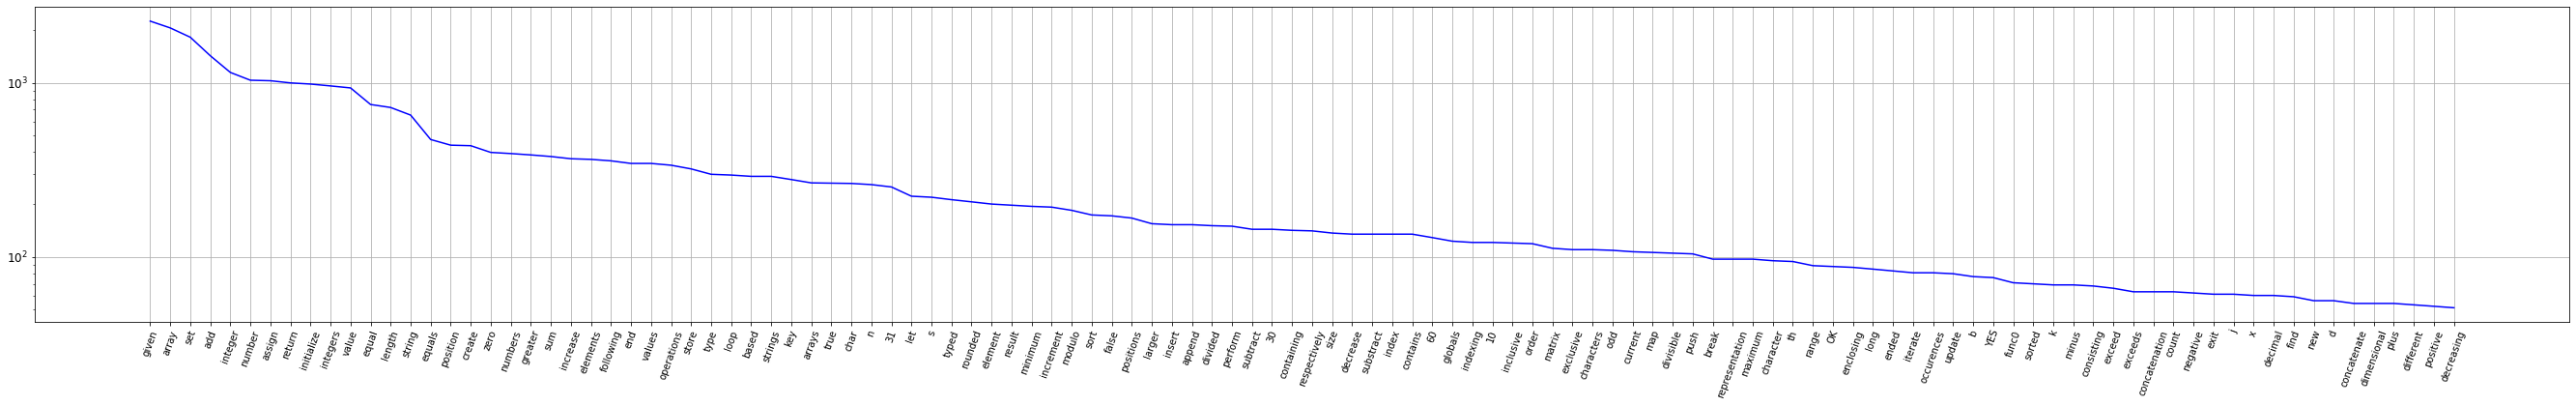

In [31]:
def update(vocab, xs):
    for x in xs:
        vocab[x] += 1
    return vocab

def clean(word):
    word = word.lower()
    b1 = re.match(r'[^a-z]$', word)
    b2 = re.match(r'^var[0-9]+', word)
    b3 = word in STOP_WORDS
    return b1 is None and b2 is None and not b3

vocabulary = Counter()
for i in range(len(train_data)):
    vocabulary = update(
        vocabulary, 
        xs=list(map(lambda w : w, filter(clean, get_by_key(train_data[i], key='text'))))
    )

print(f"vocab length: {len(vocabulary)}")
    
pred = lambda x : x > 50
labels, values = zip(*filter(lambda p : pred(p[1]), vocabulary.most_common()))

plt.figure(figsize=(int(0.41 * len(values)), 6))
plt.xticks(range(len(values)), labels, rotation=70, fontsize=10)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.plot(range(len(values)), values, 'b-')
plt.grid()
plt.show()